<a href="https://colab.research.google.com/github/Sibitenda/BAchelors_CS/blob/main/Data%20Mining%20and%20BI/week2_preparations/data_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA TRANSFORMATION
    Value mapping

    Feature construction

    Aggregation

    Normalization (min-max, z-score)

    Discretization / categorical encoding

    Text processing (tokenization, lemmatization)

    Time-based features

###Value Mapping (Replacing values)

In [1]:
import seaborn as sns
import pandas as pd

# Load dataset
titanic = sns.load_dataset('titanic')

# Map 'sex' column to numeric values
titanic['sex_mapped'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic[['sex', 'sex_mapped']].head()


,sex,sex_mapped
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


###Attribute/Feature Construction

In [2]:
# Create new feature: family size = sibsp + parch
titanic['family_size'] = titanic['sibsp'] + titanic['parch']
titanic[['sibsp', 'parch', 'family_size']].head()


,sibsp,parch,family_size
0,1,0,1
1,1,0,1
2,0,0,0
3,1,0,1
4,0,0,0


In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_mapped,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,0


###Aggregation / Summarization

In [4]:
# Load penguins dataset
penguins = sns.load_dataset('penguins')

# Aggregate: average body_mass_g per species
agg_species = penguins.groupby('species')['body_mass_g'].mean().reset_index()
agg_species


,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


In [5]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


###Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select numeric column
X = penguins[['body_mass_g']].dropna()

# Min-Max Normalization
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
pd.DataFrame(X_minmax, columns=['body_mass_g_minmax']).head()
# X_minmax



,body_mass_g_minmax
0,0.291667
1,0.305556
2,0.152778
3,0.208333
4,0.263889


In [9]:
# Z-score Normalization
scaler = StandardScaler()
X_z = scaler.fit_transform(X)
pd.DataFrame(X_z, columns=['body_mass_g_zscore']).head()
# X_z

,body_mass_g_zscore
0,-0.564142
1,-0.501703
2,-1.188532
3,-0.938776
4,-0.689020


In [25]:
from sklearn.preprocessing import StandardScaler

# Compute mean and std
fare_mean = titanic['fare'].mean()
fare_std = titanic['fare'].std()

# Example: Z-score for fare = 73
fare_example = 73.0
z_score = (fare_example - fare_mean) / fare_std
print("Fare $73 Z-score:", z_score)

# Apply to entire column
scaler = StandardScaler()
titanic['fare_zscore'] = scaler.fit_transform(titanic[['fare']])


Fare $73 Z-score: 0.820949433014966


###Decimal Scaling Normalization

In [26]:
import numpy as np

# Find j for fare
max_abs = titanic['fare'].abs().max()
j = int(np.ceil(np.log10(max_abs + 1)))  # +1 to handle exact powers of 10

# Apply decimal scaling
titanic['fare_decimal'] = titanic['fare'] / (10**j)

# Example for fare = 73
fare_example = 73.0
fare_decimal = fare_example / (10**j)
print("Fare $73 after decimal scaling:", fare_decimal)


Fare $73 after decimal scaling: 0.073


In [28]:
# titanic['fare_decimal']

###Robust Scaling
Effect: Scales based on median and IQR, less sensitive to outliers.

In [29]:
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Fill missing fare values
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].mean())

# Apply Robust Scaler
robust_scaler = RobustScaler()
titanic['fare_robust'] = robust_scaler.fit_transform(titanic[['fare']])

# Display example
titanic[['fare', 'fare_robust']].head()


,fare,fare_robust
0,7.2500,-0.312011
1,71.2833,2.461242
2,7.9250,-0.282777
3,53.1000,1.673732
4,8.0500,-0.277363


### Max Absolute Scaling
Effect: Scales values to [-1, 1] by dividing by the maximum absolute value.

Good for sparse data or features that must maintain sign.

In [30]:
from sklearn.preprocessing import MaxAbsScaler

# Apply Max Absolute Scaler
maxabs_scaler = MaxAbsScaler()
titanic['fare_maxabs'] = maxabs_scaler.fit_transform(titanic[['fare']])

# Display example
titanic[['fare', 'fare_maxabs']].head()


,fare,fare_maxabs
0,7.2500,0.014151
1,71.2833,0.139136
2,7.9250,0.015469
3,53.1000,0.103644
4,8.0500,0.015713


###Log Transformation
Effect: Reduces skewness in highly skewed distributions like fare.

Makes data more normal-like, improving model performance.

In [31]:
import numpy as np

# Apply Log Transformation
titanic['fare_log'] = np.log1p(titanic['fare'])  # log(1 + x) to handle zero

# Display example
titanic[['fare', 'fare_log']].head()


,fare,fare_log
0,7.2500,2.110213
1,71.2833,4.280593
2,7.9250,2.188856
3,53.1000,3.990834
4,8.0500,2.202765


In [34]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# # Load Titanic dataset
# titanic = sns.load_dataset('titanic')
# titanic['fare'] = titanic['fare'].fillna(titanic['fare'].mean())

# # Take a small sample to illustrate (first 10 fares)
# sample_fares = titanic['fare'].iloc[:10].reset_index(drop=True)
# df_sample = pd.DataFrame({'Original': sample_fares})

# # 1. Min-Max Scaling [0,1]
# minmax = MinMaxScaler()
# df_sample['MinMax'] = minmax.fit_transform(sample_fares.values.reshape(-1,1))

# # 2. Z-score Scaling
# zscore = StandardScaler()
# df_sample['ZScore'] = zscore.fit_transform(sample_fares.values.reshape(-1,1))

# # 3. Decimal Scaling
# max_abs = sample_fares.abs().max()
# j = int(np.ceil(np.log10(max_abs + 1)))
# df_sample['Decimal'] = sample_fares / (10**j)

# # 4. Robust Scaling
# robust = RobustScaler()
# df_sample['Robust'] = robust.fit_transform(sample_fares.values.reshape(-1,1))

# # 5. Max-Abs Scaling
# maxabs = MaxAbsScaler()
# df_sample['MaxAbs'] = maxabs.fit_transform(sample_fares.values.reshape(-1,1))

# # 6. Log Transformation
# df_sample['Log'] = np.log1p(sample_fares)

# # Plot comparison
# df_sample.plot(kind='bar', figsize=(12,6))
# plt.title('Comparison of Normalization Methods (Sample Titanic Fares)')
# plt.xlabel('Sample Index')
# plt.ylabel('Transformed Value')
# plt.xticks(rotation=0)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

# # Show table of values
# df_sample


###Discretization / Categorical Encoding
| Concept                     | Implementation Example                                                              |
| --------------------------- | ----------------------------------------------------------------------------------- |
| Nominal                     | `sex` → one-hot encoded (`sex_female`, `sex_male`)                                  |
| Ordinal                     | `class` → mapped to numbers (`1, 2, 3`)                                             |
| Numeric                     | `age`, `fare`                                                                       |
| Discretization (intervals)  | `age_bin` (equal-width), `fare_bin` (quantile), `age_bin_kb` (uniform bins)         |
| Supervised vs. Unsupervised | `KBinsDiscretizer` shows how supervised binning can be done for predictive tasks    |
| Split (top-down) vs merge   | Top-down: split into fixed bins; Bottom-up: could merge small intervals recursively |


In [36]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Keep relevant columns for demonstration
df = titanic[['sex', 'class', 'age', 'fare']].copy()
df['age'] = df['age'].fillna(df['age'].mean())  # handle missing values
df['fare'] = df['fare'].fillna(df['fare'].mean())
# df.head()
# Nominal: 'sex' (unordered set)
# Ordinal: 'class' (first, second, third)
# Numeric: 'age', 'fare'

print("Nominal attribute example:", df['sex'].unique())
print("Ordinal attribute example:", df['class'].unique())
print("Numeric attribute example:", df[['age', 'fare']].describe())


Nominal attribute example: ['male' 'female']
Ordinal attribute example: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
Numeric attribute example:               age        fare
count  891.000000  891.000000
mean    29.699118   32.204208
std     13.002015   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     29.699118   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


In [38]:
# One-hot encoding for nominal attribute 'sex'
df_nominal = pd.get_dummies(df['sex'], prefix='sex')
df = pd.concat([df, df_nominal], axis=1)
df

,sex,class,age,fare,sex_female,sex_male,sex_female,sex_male
0,male,Third,22.000000,7.2500,False,True,False,True
1,female,First,38.000000,71.2833,True,False,True,False
2,female,Third,26.000000,7.9250,True,False,True,False
3,female,First,35.000000,53.1000,True,False,True,False
4,male,Third,35.000000,8.0500,False,True,False,True
...,...,...,...,...,...,...,...,...
886,male,Second,27.000000,13.0000,False,True,False,True
887,female,First,19.000000,30.0000,True,False,True,False
888,female,Third,29.699118,23.4500,True,False,True,False
889,male,First,26.000000,30.0000,False,True,False,True


In [41]:
# Define mapping for 'class': 1st > 2nd > 3rd
class_mapping = {'First': 3, 'Second': 2, 'Third': 1}
df['class_encoded'] = df['class'].map(class_mapping)
df

,sex,class,age,fare,sex_female,sex_male,sex_female,sex_male,class_encoded
0,male,Third,22.000000,7.2500,False,True,False,True,1
1,female,First,38.000000,71.2833,True,False,True,False,3
2,female,Third,26.000000,7.9250,True,False,True,False,1
3,female,First,35.000000,53.1000,True,False,True,False,3
4,male,Third,35.000000,8.0500,False,True,False,True,1
...,...,...,...,...,...,...,...,...,...
886,male,Second,27.000000,13.0000,False,True,False,True,2
887,female,First,19.000000,30.0000,True,False,True,False,3
888,female,Third,29.699118,23.4500,True,False,True,False,1
889,male,First,26.000000,30.0000,False,True,False,True,3


In [11]:
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, LabelEncoder

# Discretization: bin body_mass_g into 3 bins
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
penguins['body_mass_bin'] = kbd.fit_transform(penguins[['body_mass_g']].fillna(0))
penguins[['body_mass_g', 'body_mass_bin']].head()

# One-hot encoding species
# ohe = OneHotEncoder(sparse=False)
# species_ohe = ohe.fit_transform(penguins[['species']].dropna())
ohe = OneHotEncoder(sparse_output=False)  # <-- changed from sparse=False
species_ohe = ohe.fit_transform(penguins[['species']].dropna())

pd.DataFrame(species_ohe, columns=ohe.get_feature_names_out(['species'])).head()

# Label encoding sex
le = LabelEncoder()
penguins['sex_encoded'] = le.fit_transform(penguins['sex'].astype(str))
penguins[['sex', 'sex_encoded']].head()


,sex,sex_encoded
0,Male,1
1,Female,0
2,Female,0
3,NaN,2
4,Female,0


###Discretization of Numeric Attributes

Unsupervised (Equal Width Binning)

In [42]:
# Divide 'age' into 3 equal-width bins
df['age_bin'] = pd.cut(df['age'], bins=3, labels=['Young', 'Adult', 'Senior'])
df

,sex,class,age,fare,sex_female,sex_male,sex_female,sex_male,class_encoded,age_bin
0,male,Third,22.000000,7.2500,False,True,False,True,1,Young
1,female,First,38.000000,71.2833,True,False,True,False,3,Adult
2,female,Third,26.000000,7.9250,True,False,True,False,1,Young
3,female,First,35.000000,53.1000,True,False,True,False,3,Adult
4,male,Third,35.000000,8.0500,False,True,False,True,1,Adult
...,...,...,...,...,...,...,...,...,...,...
886,male,Second,27.000000,13.0000,False,True,False,True,2,Adult
887,female,First,19.000000,30.0000,True,False,True,False,3,Young
888,female,Third,29.699118,23.4500,True,False,True,False,1,Adult
889,male,First,26.000000,30.0000,False,True,False,True,3,Young


Unsupervised (Equal Frequency / Quantile Binning)

In [44]:
# Divide 'fare' into 4 quantiles
df['fare_bin'] = pd.qcut(df['fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
df

,sex,class,age,fare,sex_female,sex_male,sex_female,sex_male,class_encoded,age_bin,fare_bin
0,male,Third,22.000000,7.2500,False,True,False,True,1,Young,Low
1,female,First,38.000000,71.2833,True,False,True,False,3,Adult,Very High
2,female,Third,26.000000,7.9250,True,False,True,False,1,Young,Medium
3,female,First,35.000000,53.1000,True,False,True,False,3,Adult,Very High
4,male,Third,35.000000,8.0500,False,True,False,True,1,Adult,Medium
...,...,...,...,...,...,...,...,...,...,...,...
886,male,Second,27.000000,13.0000,False,True,False,True,2,Adult,Medium
887,female,First,19.000000,30.0000,True,False,True,False,3,Young,High
888,female,Third,29.699118,23.4500,True,False,True,False,1,Adult,High
889,male,First,26.000000,30.0000,False,True,False,True,3,Young,High


Supervised Discretization Example (with target)

In [45]:
# Example: Use KBinsDiscretizer (supervised can use target correlation, here we just use bins)
kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # top-down
df['age_bin_kb'] = kb.fit_transform(df[['age']])
df

,sex,class,age,fare,sex_female,sex_male,sex_female,sex_male,class_encoded,age_bin,fare_bin,age_bin_kb
0,male,Third,22.000000,7.2500,False,True,False,True,1,Young,Low,0.0
1,female,First,38.000000,71.2833,True,False,True,False,3,Adult,Very High,1.0
2,female,Third,26.000000,7.9250,True,False,True,False,1,Young,Medium,0.0
3,female,First,35.000000,53.1000,True,False,True,False,3,Adult,Very High,1.0
4,male,Third,35.000000,8.0500,False,True,False,True,1,Adult,Medium,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,Second,27.000000,13.0000,False,True,False,True,2,Adult,Medium,1.0
887,female,First,19.000000,30.0000,True,False,True,False,3,Young,High,0.0
888,female,Third,29.699118,23.4500,True,False,True,False,1,Adult,High,1.0
889,male,First,26.000000,30.0000,False,True,False,True,3,Young,High,0.0


###Text Processing

In [16]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the correct tokenizer for Colab
nltk.download('punkt_tab')   # <-- Colab-specific fix
nltk.download('wordnet')     # for lemmatization

text = "Data transformation techniques include mapping, normalization, and discretization."
tokens = word_tokenize(text.lower())
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in tokens]

print("Tokens:", tokens)
print("Lemmas:", lemmas)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Tokens: ['data', 'transformation', 'techniques', 'include', 'mapping', ',', 'normalization', ',', 'and', 'discretization', '.']
Lemmas: ['data', 'transformation', 'technique', 'include', 'mapping', ',', 'normalization', ',', 'and', 'discretization', '.']


###Time-based Features

In [19]:
# Load flights dataset
flights = sns.load_dataset('flights')

# Convert to datetime
flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'].astype(str) + '-01', errors='coerce')

# Extract features
flights['year'] = flights['date'].dt.year
flights['month'] = flights['date'].dt.month
flights['quarter'] = flights['date'].dt.quarter
flights[['date', 'year', 'month', 'quarter']].head()


,date,year,month,quarter
0,1949-01-01,1949,1,1
1,1949-02-01,1949,2,1
2,1949-03-01,1949,3,1
3,1949-04-01,1949,4,2
4,1949-05-01,1949,5,2


In [20]:
flights

,year,month,passengers,date,quarter
0,1949,1,112,1949-01-01,1
1,1949,2,118,1949-02-01,1
2,1949,3,132,1949-03-01,1
3,1949,4,129,1949-04-01,2
4,1949,5,121,1949-05-01,2
...,...,...,...,...,...
139,1960,8,606,1960-08-01,3
140,1960,9,508,1960-09-01,3
141,1960,10,461,1960-10-01,4
142,1960,11,390,1960-11-01,4


In [23]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Load dataset
titanic = sns.load_dataset('titanic')

# --- Value Mapping ---
titanic['sex_mapped'] = titanic['sex'].map({'male': 0, 'female': 1})

# --- Feature Construction ---
titanic['family_size'] = titanic['sibsp'] + titanic['parch']

# --- Normalization ---
scaler = MinMaxScaler()
titanic['age_scaled'] = scaler.fit_transform(titanic[['age']].fillna(titanic['age'].mean()))

# --- Categorical Encoding (One-hot) ---
ohe = OneHotEncoder(sparse_output=False)
embarked_ohe = ohe.fit_transform(titanic[['embarked']].fillna('missing'))
embarked_df = pd.DataFrame(embarked_ohe, columns=ohe.get_feature_names_out(['embarked']))
titanic = pd.concat([titanic, embarked_df], axis=1)

# Show transformed data
titanic[['sex', 'sex_mapped', 'family_size', 'age', 'age_scaled'] + list(embarked_df.columns)].head()


,sex,sex_mapped,family_size,age,age_scaled,embarked_C,embarked_Q,embarked_S,embarked_missing
0,male,0,1,22.0,0.271174,0.0,0.0,1.0,0.0
1,female,1,1,38.0,0.472229,1.0,0.0,0.0,0.0
2,female,1,0,26.0,0.321438,0.0,0.0,1.0,0.0
3,female,1,1,35.0,0.434531,0.0,0.0,1.0,0.0
4,male,0,0,35.0,0.434531,0.0,0.0,1.0,0.0


In [24]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
import pandas as pd

# Load dataset
penguins = sns.load_dataset('penguins')

# --- Label Encoding ---
le = LabelEncoder()
penguins['sex_encoded'] = le.fit_transform(penguins['sex'].astype(str))

# --- Discretization (Binning) ---
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
penguins['body_mass_bin'] = kbd.fit_transform(penguins[['body_mass_g']].fillna(0))

# --- Aggregation / Feature Summarization ---
agg_species = penguins.groupby('species').agg({'body_mass_g':'mean', 'flipper_length_mm':'mean'}).reset_index()

# Show transformed data
penguins[['sex', 'sex_encoded', 'body_mass_g', 'body_mass_bin']].head(), agg_species


(      sex  sex_encoded  body_mass_g  body_mass_bin
 0    Male            1       3750.0            1.0
 1  Female            0       3800.0            1.0
 2  Female            0       3250.0            1.0
 3     NaN            2          NaN            0.0
 4  Female            0       3450.0            1.0,
      species  body_mass_g  flipper_length_mm
 0     Adelie  3700.662252         189.953642
 1  Chinstrap  3733.088235         195.823529
 2     Gentoo  5076.016260         217.186992)

#Assignment
1. COVID-19 Dataset (Johns Hopkins / Kaggle)
URL / Access: Johns Hopkins COVID-19 https://github.com/CSSEGISandData/COVID-19

      Practice Questions:

      Handle missing values in confirmed, deaths, and recovered.

      Create new features: active_cases = confirmed - deaths - recovered.

      Normalize daily new cases using Min-Max or Z-score.

      Aggregate cases by country or month (feature construction).

      Plot normalized time-series for selected countries.

      Discretize daily_new_cases into 3 intervals: low, medium, high, based on quantiles or thresholds.
      
      Optionally, discretize active_cases into intervals to identify high-risk regions.
---      

2. Wine Quality Dataset (UCI)
URL / Access: UCI Wine Quality https://archive.ics.uci.edu/dataset/186/wine+quality

      Practice Questions:

      Check for missing or inconsistent values in chemical features.

      Normalize alcohol, density, and pH using Min-Max or Z-score.

      Detect and handle outliers using IQR or Z-score method.

      Create a new feature: acidity_ratio = fixed_acidity / volatile_acidity.

      Discretize quality into 3 classes: low, medium, high.

##Discretization by Correlations
Correlation Between Numeric Features and Class (Chi-square)
Discretize numeric features first (equal-width) to make them categorical.

Compute Chi-square test against the class.

| Variable Types          | Correlation Method                   | Notes                                  |
| ----------------------- | ------------------------------------ | -------------------------------------- |
| Numeric-Numeric         | Pearson / Spearman / Kendall         | Linear or monotonic association        |
| Numeric-Categorical     | Point-biserial / ANOVA / Eta-squared | Measures how numeric varies with class |
| Categorical-Categorical | Chi-square / Cramér’s V              | Measures association strength          |


In [49]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load Wine Quality dataset (red wine)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [50]:
# For demonstration, convert quality into 3 classes
df['quality_class'] = pd.cut(df['quality'], bins=[0,4,6,10], labels=['Low','Medium','High'])
# Example: discretize 'alcohol' into 3 bins
df['alcohol_bin'] = pd.cut(df['alcohol'], bins=3, labels=['Low','Medium','High'])

# Create contingency table
contingency_table = pd.crosstab(df['alcohol_bin'], df['quality_class'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
df

Chi-square statistic: 212.49977328527964
p-value: 7.702955165465177e-45


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class,alcohol_bin
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium,Low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Medium,Low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Medium,Low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Medium,Low
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Medium,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Medium,Low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Medium,Medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Medium,Medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Medium,Low


 Interpretation:

High χ² → alcohol and quality_class are strongly related.

Low χ² → little relationship.

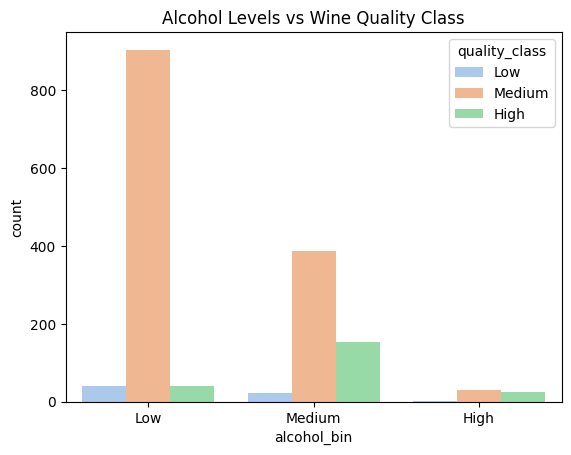

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='alcohol_bin', hue='quality_class', data=df, palette='pastel')
plt.title('Alcohol Levels vs Wine Quality Class')
plt.show()

Numeric vs Numeric

Pearson correlation: Measures linear relationship between two continuous variables.

Spearman correlation: Non-parametric; measures monotonic relationship (good for skewed data).

Kendall’s tau: Non-parametric; measures ordinal association.

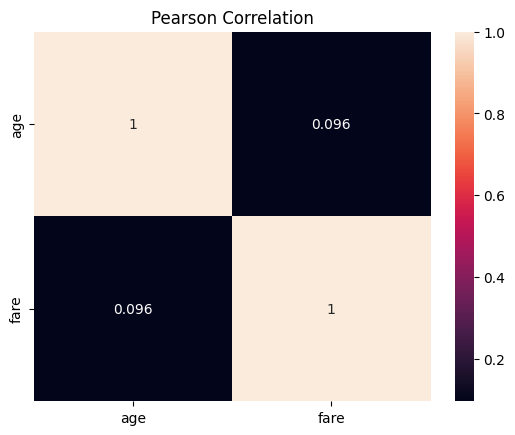

In [52]:
# Example: Titanic dataset
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
corr_matrix = titanic[['age','fare']].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Pearson Correlation')
plt.show()


Numeric vs Categorical

Point-biserial correlation: Numeric vs binary class.

ANOVA / F-test: Numeric vs multi-class categorical.

Eta-squared: Measures strength of association between numeric and categorical.

In [53]:
from scipy.stats import pointbiserialr

# Numeric feature vs binary class
r, p = pointbiserialr(titanic['fare'].fillna(0), titanic['survived'])
print("Point-biserial correlation:", r, "p-value:", p)


Point-biserial correlation: 0.2573065223849624 p-value: 6.12018934192415e-15


 Categorical vs Categorical

Chi-square test of independence: Checks association between two categorical variables.

Cramér’s V: Normalized measure of association from Chi-square (0–1).



In [54]:
import pandas as pd
import numpy as np

contingency = pd.crosstab(titanic['sex'], titanic['class'])
chi2, p, dof, expected = chi2_contingency(contingency)
cramers_v = np.sqrt(chi2 / (titanic.shape[0] * (min(contingency.shape)-1)))
print("Cramér's V:", cramers_v)


Cramér's V: 0.1380133986221395


In [55]:
import pandas as pd
import numpy as np

contingency = pd.crosstab(titanic['sex'], titanic['class'])
chi2, p, dof, expected = chi2_contingency(contingency)
cramers_v = np.sqrt(chi2 / (titanic.shape[0] * (min(contingency.shape)-1)))
print("Cramér's V:", cramers_v)


Cramér's V: 0.1380133986221395


First few rows:
      age     fare
0   22.0   7.2500
1   38.0  71.2833
2   26.0   7.9250
3   35.0  53.1000
4   35.0   8.0500
6   54.0  51.8625
7    2.0  21.0750
8   27.0  11.1333
9   14.0  30.0708
10   4.0  16.7000
11  58.0  26.5500
12  20.0   8.0500
13  39.0  31.2750
14  14.0   7.8542
15  55.0  16.0000
16   2.0  29.1250
18  31.0  18.0000
20  35.0  26.0000
21  34.0  13.0000
22  15.0   8.0292

Covariance matrix:
              age        fare
age   211.019125    73.84903
fare   73.849030  2800.41310

Covariance between age and fare: 73.85

Correlation matrix:
            age      fare
age   1.000000  0.096067
fare  0.096067  1.000000

Correlation between age and fare: 0.096

NumPy covariance matrix:
 [[ 211.01912475   73.84902981]
 [  73.84902981 2800.4130997 ]]

NumPy correlation matrix:
 [[1.         0.09606669]
 [0.09606669 1.        ]]


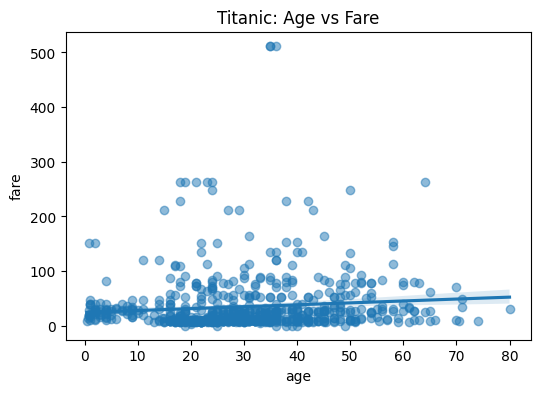


Interpretation:
- Covariance is positive, meaning older passengers tended to pay slightly higher fares.
- The correlation is close to 0, meaning the linear relationship is weak despite the positive trend.


In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------
# 1. Load Titanic dataset
# -----------------------
titanic = sns.load_dataset("titanic")

# Select numeric columns of interest and drop missing values
df = titanic[['age', 'fare']].dropna()

print("First few rows:\n", df.head(20))

# -----------------------
# 2. Covariance (pandas)
# -----------------------
cov_matrix = df.cov()
cov_age_fare = cov_matrix.loc['age', 'fare']
print(f"\nCovariance between age and fare: {cov_age_fare:.2f}")

corr_matrix = df.corr()
corr_age_fare = corr_matrix.loc['age', 'fare']
print(f"\nCorrelation between age and fare: {corr_age_fare:.3f}")

# -----------------------
# 4. NumPy calculation
# -----------------------
cov_numpy = np.cov(df['age'], df['fare'], bias=False)
corr_numpy = np.corrcoef(df['age'], df['fare'])

print("\nNumPy covariance matrix:\n", cov_numpy)
print("\nNumPy correlation matrix:\n", corr_numpy)

# -----------------------
# 5. Visualization
# -----------------------
plt.figure(figsize=(6,4))
sns.regplot(x='age', y='fare', data=df, scatter_kws={'alpha':0.5})
plt.title("Titanic: Age vs Fare")
plt.show()

# -----------------------
# 6. Interpretation
# -----------------------
print("\nInterpretation:")
print("- Covariance is positive, meaning older passengers tended to pay slightly higher fares.")
print("- The correlation is close to 0, meaning the linear relationship is weak despite the positive trend.")


#2. DATA REDUCTION

| Strategy                                | Description                                          | Example / Notes                               |
| --------------------------------------- | ---------------------------------------------------- | --------------------------------------------- |
| **Dimensionality Reduction**            | Remove unimportant attributes                        | Drop irrelevant columns, PCA                  |
| **Wavelet Transforms**                  | Transform data for **compact representation**        | Signal processing, compression                |
| **Principal Components Analysis (PCA)** | Reduce correlated features into principal components | Numeric datasets like Iris or Wine Quality    |
| **Feature Subset Selection / Creation** | Keep only relevant features or combine them          | Selecting top predictors in Titanic dataset   |
| **Numerosity Reduction**                | Reduce number of records                             | Sampling, clustering                          |
| **Regression / Log-Linear Models**      | Summarize data relationships                         | Predictive models to represent data compactly |
| **Histograms / Clustering / Sampling**  | Aggregate or group similar data points               | Bin numeric variables, k-means clusters       |
| **Data Cube Aggregation**               | Precompute summaries for OLAP                        | Total sales per region/month                  |
| **Data Compression**                    | Encode data to occupy less storage                   | Zip, run-length encoding, quantization        |




##Dimensionality Reduction (Drop Unimportant Columns)

Removes irrelevant columns.

Expect smaller dataset focusing only on features important for analysis.



In [59]:
import pandas as pd
import seaborn as sns

# Titanic dataset
titanic = sns.load_dataset('titanic')

# Keep only relevant columns
titanic_reduced = titanic[['survived', 'pclass', 'sex', 'age', 'fare']]
print(titanic_reduced.head())


   survived  pclass     sex   age     fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500


In [71]:
import pywt
import numpy as np
import seaborn as sns

# Load dataset
titanic = sns.load_dataset('titanic').dropna(subset=['fare'])

# Treat 'fare' as a 1D signal
fare_data = titanic['fare'].values

# Apply Discrete Wavelet Transform
coeffs = pywt.wavedec(fare_data, 'db1', level=2)

# Approximation coefficients capture main trend
approx = coeffs[0]
print("Original length:", len(fare_data))
print("Reduced representation length (approx):", len(approx))


Original length: 891
Reduced representation length (approx): 223


Principal Component Analysis (PCA)

Combines correlated features into principal components.

Expect fewer dimensions that capture most variance.

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(wine_url, sep=';')

# Standardize numeric features
X = StandardScaler().fit_transform(wine.drop('quality', axis=1))

# PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.28173931 0.1750827 ]


Explained variance ratio: [0.28173931 0.1750827 ]


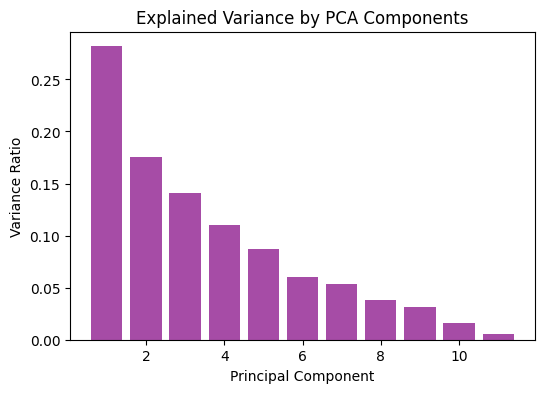

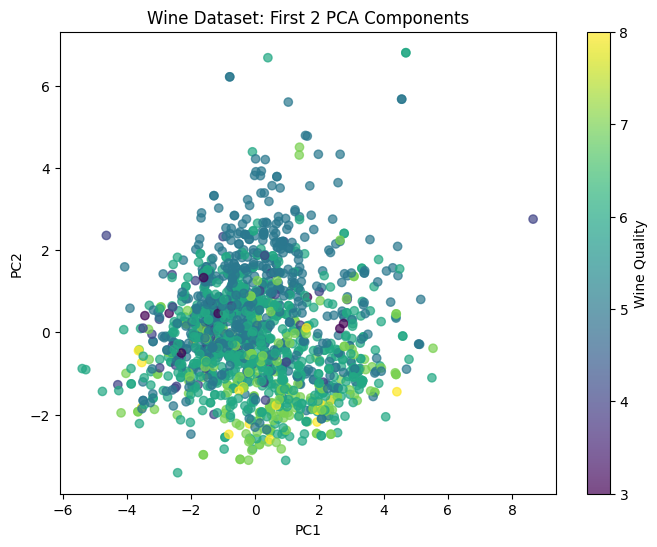

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Wine Quality dataset
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(wine_url, sep=';')

# Standardize numeric features
X = StandardScaler().fit_transform(wine.drop('quality', axis=1))
y = wine['quality']  # We'll color points by wine quality

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot explained variance ratio for all components
pca_full = PCA().fit(X)
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(pca_full.explained_variance_ratio_) + 1),
        pca_full.explained_variance_ratio_,
        alpha=0.7, color='purple')
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.title("Explained Variance by PCA Components")
plt.show()

# Scatter plot of first 2 principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=y, cmap='viridis', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine Dataset: First 2 PCA Components")
cbar = plt.colorbar(scatter)
cbar.set_label("Wine Quality")
plt.show()


 Feature Subset Selection / Creation

 Creates meaningful new features and keeps only useful ones.

Expect enhanced predictive power with fewer columns.

In [65]:
# Create new feature: family_size in Titanic
titanic['family_size'] = titanic['sibsp'] + titanic['parch']
# Select subset
titanic_subset = titanic[['survived', 'pclass', 'sex', 'age', 'family_size']]
print(titanic_subset.head())


   survived  pclass     sex   age  family_size
0         0       3    male  22.0            1
1         1       1  female  38.0            1
2         1       3  female  26.0            0
3         1       1  female  35.0            1
4         0       3    male  35.0            0


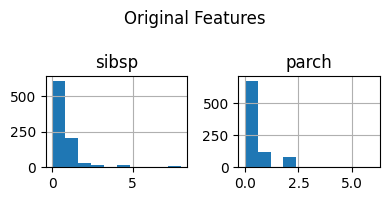

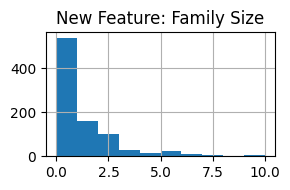

,survived,pclass,sex,age,family_size
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0
...,...,...,...,...,...
886,0,2,male,27.0,0
887,1,1,female,19.0,0
888,0,3,female,NaN,3
889,1,1,male,26.0,0


In [79]:
# # Create new feature: family_size in Titanic
# titanic['family_size'] = titanic['sibsp'] + titanic['parch']
# titanic_subset = titanic[['survived', 'pclass', 'sex', 'age', 'family_size']]

# # Compare distributions
# titanic[['sibsp','parch']].hist()
# plt.suptitle('Original Features')
# plt.show()
# titanic_subset['family_size'].hist()
# plt.title('New Feature: Family Size')
# plt.show()
import matplotlib.pyplot as plt
import seaborn as sns

# Create new feature: family_size in Titanic
titanic['family_size'] = titanic['sibsp'] + titanic['parch']
titanic_subset = titanic[['survived', 'pclass', 'sex', 'age', 'family_size']]

# Compare distributions - smaller plots
titanic[['sibsp', 'parch']].hist(figsize=(4, 2))  # width=6, height=3 inches
plt.suptitle('Original Features')
plt.tight_layout()
plt.show()

plt.figure(figsize=(3, 2))  # smaller single plot
titanic_subset['family_size'].hist()
plt.title('New Feature: Family Size')
plt.tight_layout()
plt.show()
titanic_subset


Numerosity Reduction (Sampling / Clustering)

Reduces the number of rows while preserving distribution.

Expect faster computations on a representative subset.

In [66]:
# Sampling 20% of Titanic dataset
titanic_sample = titanic.sample(frac=0.2, random_state=42)
print(titanic_sample.shape)


(178, 16)


Regression / Log-Linear Models

Models relationships to summarize data compactly.

Expect fewer parameters representing trends instead of full dataset.

In [67]:
from sklearn.linear_model import LinearRegression

# Predict fare using age and pclass
df = titanic.dropna(subset=['age','fare','pclass'])
X = df[['age','pclass']]
y = df['fare']

model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)


Coefficients: [ -0.45786625 -37.91534952]


Histograms / Binning

Groups continuous variables into intervals.

Expect simplified data easier to analyze or visualize.

In [68]:
# Bin Titanic ages into 5 intervals
titanic['age_bin'] = pd.cut(titanic['age'], bins=5, labels=False)
print(titanic[['age','age_bin']].head())


    age  age_bin
0  22.0      1.0
1  38.0      2.0
2  26.0      1.0
3  35.0      2.0
4  35.0      2.0


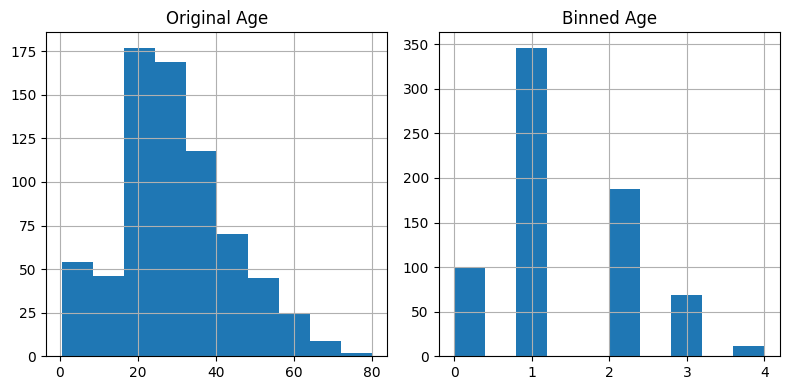

In [76]:
# Bin Titanic ages into 5 intervals
titanic['age_bin'] = pd.cut(titanic['age'], bins=5, labels=False)

# Plot original vs binned
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
titanic['age'].hist()
plt.title('Original Age')

plt.subplot(1,2,2)
titanic['age_bin'].hist()
plt.title('Binned Age')
plt.tight_layout()
plt.show()


Data Cube Aggregation

Precomputes summaries along dimensions.

Expect faster access to aggregated insights, e.g., survival rates by group.



In [81]:
# Load dataset
titanic = sns.load_dataset('titanic')
# Aggregate Titanic by class and sex
agg = titanic.groupby(['pclass','sex'])['survived'].mean().reset_index()
print(agg)


   pclass     sex  survived
0       1  female  0.968085
1       1    male  0.368852
2       2  female  0.921053
3       2    male  0.157407
4       3  female  0.500000
5       3    male  0.135447


In [82]:
agg.shape

(6, 3)

##Sampling

What to Expect:

    Simple Random → completely random subset.

    Without Replacement → no duplicates.

    With Replacement → duplicates possible.

    Stratified → maintains original class proportions.



Simple Random Sampling


In [83]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Simple random sample: 10% of data
simple_random = titanic.sample(frac=0.1, random_state=42)
print(simple_random.head())

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
709         1       3    male   NaN      1      1  15.2458        C   Third   
439         0       2    male  31.0      0      0  10.5000        S  Second   
840         0       3    male  20.0      0      0   7.9250        S   Third   
720         1       2  female   6.0      0      1  33.0000        S  Second   
39          1       3  female  14.0      1      0  11.2417        C   Third   

       who  adult_male deck  embark_town alive  alone  
709    man        True  NaN    Cherbourg   yes  False  
439    man        True  NaN  Southampton    no   True  
840    man        True  NaN  Southampton    no   True  
720  child       False  NaN  Southampton   yes  False  
39   child       False  NaN    Cherbourg   yes  False  


Sampling Without Replacement
python
Copy
Edit


In [84]:
# Without replacement: pandas.sample() default behavior
without_replacement = titanic.sample(n=5, replace=False, random_state=42)
print(without_replacement)


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
709         1       3    male   NaN      1      1  15.2458        C   Third   
439         0       2    male  31.0      0      0  10.5000        S  Second   
840         0       3    male  20.0      0      0   7.9250        S   Third   
720         1       2  female   6.0      0      1  33.0000        S  Second   
39          1       3  female  14.0      1      0  11.2417        C   Third   

       who  adult_male deck  embark_town alive  alone  
709    man        True  NaN    Cherbourg   yes  False  
439    man        True  NaN  Southampton    no   True  
840    man        True  NaN  Southampton    no   True  
720  child       False  NaN  Southampton   yes  False  
39   child       False  NaN    Cherbourg   yes  False  


Sampling With Replacement

In [85]:
# With replacement: replace=True
with_replacement = titanic.sample(n=5, replace=True, random_state=42)
print(with_replacement)


     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
102         0       1    male  21.0      0      1   77.2875        S  First   
435         1       1  female  14.0      1      2  120.0000        S  First   
860         0       3    male  41.0      2      0   14.1083        S  Third   
270         0       1    male   NaN      0      0   31.0000        S  First   
106         1       3  female  21.0      0      0    7.6500        S  Third   

       who  adult_male deck  embark_town alive  alone  
102    man        True    D  Southampton    no  False  
435  child       False    B  Southampton   yes  False  
860    man        True  NaN  Southampton    no  False  
270    man        True  NaN  Southampton    no   True  
106  woman       False  NaN  Southampton   yes   True  


Stratified Sampling

In [86]:
# Stratify by 'class' column, keeping proportions
stratified = titanic.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))
print(stratified['class'].value_counts(normalize=True))


class
Third     0.550562
First     0.241573
Second    0.207865
Name: proportion, dtype: float64


/tmp/ipython-input-1893588089.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stratified = titanic.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))
/tmp/ipython-input-1893588089.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified = titanic.groupby('class', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=42))


#ASSIGNMENT

Make complete data preparation, reduction, ending with insights or visualizations from the reduced data. Dataset:https://archive.ics.uci.edu/ml/datasets/wine+quality
1. Data Cleaning
Are there any missing values? How will you handle them?
Are there outliers or extreme values that need addressing?
Do all variables have the same scale? If not, which scaling method will you apply?
2. Feature Analysis
Which features have low variance and could be removed?
Are there correlated features that can be reduced?
3. Dimensionality Reduction
Apply at least two different methods (e.g., PCA, UMAP, t-SNE, Autoencoder).
Compare the results: Which method preserved structure better?
4. Visualization
Create 2D or 3D plots of the reduced dataset.
What patterns do you observe in clusters or separations?
5. Reflection
How did dimensionality reduction affect interpretability?
What trade-offs did you face between accuracy and dimensionality?
